## Final Project Submission

Please fill out:
* Student name: Alex Kaswii
* Student pace: part time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


# Microsoft Movie Studio Analysis 

## Overview
This project aims to provide insights for Microsoft's new movie studio by analyzing current box office trends using data from IMDb and Box Office Mojo.

## Business Understanding
### Real-World Problem 
Microsoft is planning to enter the movie production industry but lacks expertise in understanding which types of films are most successful at the box office. To make informed decisions, Microsoft needs to identify trends in movie performance, including which genres, directors, actors, and other factors contribute to high box office earnings.

### Stakeholders
1. Microsoft's Movie Studio Executives: Need insights to decide on the types of movies to produce to maximize box office success and ROI.
2. Marketing Teams: Can use the data to create targeted marketing campaigns based on successful genres and audience preferences.
3. Financial Analysts: Require detailed performance data to forecast potential earnings and assess financial viability.
4. Content Creators: Writers, directors, and producers can use insights to tailor their projects to meet market demands.

### Usage
1. Strategic Planning: Executives can use the insights to shape the studio’s production slate, focusing on high-performing genres and trends.
2. Marketing Strategy: Marketing teams can design campaigns that resonate with target audiences based on successful film characteristics.
3. Financial Forecasting: Financial analysts can develop more accurate revenue projections by understanding box office trends.
4. Content Development: Creators can align their content with market trends to increase the likelihood of box office success.

## Data Understanding
### Data Sources

#### IMDb
IMDb (Internet Movie Database) is a comprehensive online database of information related to films, television programs, home videos, video games, and streaming content online. IMDb is suitable for this project because it provides detailed metadata about movies, which is essential for understanding the factors contributing to a movie's success. The extensive user ratings and reviews can help gauge audience reception and preferences. It includes:
* Movie Titles
* Genres
* Directors
* Cast
* Release Dates
* User Ratings
* Reviews

#### Box Office Mojo
Box Office Mojo is a website that tracks box office revenue in a systematic, algorithmic way. It provides data on:
* Gross Earnings
* Release Dates
* Box Office Performance Over Time
* Comparative Performance of Films

Box Office Mojo is ideal for this project as it offers precise financial data on movie earnings. This data is crucial for analyzing which types of films generate the highest revenue, allowing for financial performance comparisons and trend analysis.

### Dataset size
Here we will import the necessary libraries, load the data and find the dataset sizes.

In [1]:
# Import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
%matplotlib inline

In [2]:
# Loading the box office dataset
box_office_df = pd.read_csv("Data/bom.movie_gross.csv")

# Connecting to Db
conn = sqlite3.connect("Data/im.db")

In [3]:
# Finding the dataset size
len(box_office_df)

3387

In [4]:
# Get a cursor object
cursor = conn.cursor()

In [5]:
# Query to get the table names
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()

In [6]:
# Fetch the row count for each table using pandas
table_lengths = {}
for table in tables:
    table_name = table[0]
    query = f"SELECT COUNT(*) AS count FROM {table_name};"
    df = pd.read_sql_query(query, conn)
    table_lengths[table_name] = df['count'][0]

In [7]:
# Print the lengths of each table
for table_name, length in table_lengths.items():
    print(f"Table {table_name} has {length} rows.")

Table movie_basics has 146144 rows.
Table directors has 291174 rows.
Table known_for has 1638260 rows.
Table movie_akas has 331703 rows.
Table movie_ratings has 73856 rows.
Table persons has 606648 rows.
Table principals has 1028186 rows.
Table writers has 255873 rows.


### Statistics for the features
Here we will use some pandas methods to get some general statisitcal information about our datasets.

In [8]:
# Viewing our df
box_office_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [9]:
# Getting info about the column types
box_office_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [10]:
# Getting a description of the DataFrame
box_office_df.describe()

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


Here we can see that the column types are of the correct data types. Although the issue that could later bring up an implication later on is the data having too many 0s in the domestic and foreign gross columns.

### Inclusion of features
Here we will choose certain features we want to include in our analysis and explain why we decided to.

#### Box Office Mojo Dataset (bom.movie_gross.csv.gz)

##### Features:

1. Movie Title:
* Justification: Identifies the movie being analyzed.
* Usage: Used to join with IMDB data for additional information and to distinguish between different movies.

2. Domestic Gross:
* Justification: Indicates how much revenue the movie made in the domestic market.
* Usage: Helps determine which movies performed well domestically, which can inform recommendations on targeting the domestic audience.

3. Foreign Gross:
* Justification: Indicates how much revenue the movie made in international markets.
* Usage: Helps determine the international appeal of movies, useful for recommendations on targeting global audiences.

4. Total Gross:
* Justification: Sum of domestic and foreign gross.
* Usage: Provides a comprehensive view of a movie’s financial performance, crucial for identifying high-performing movies.

5. Release Date:
* Justification: Provides the release timing of the movie.
* Usage: Can be used to analyze trends related to release dates and their impact on movie performance.

#### IMDB Dataset (im.db)

##### Tables:

1. movie_basics
* This table includes essential information about each movie such as title, original title, start year, runtime, and genres.

2. movie_ratings
* This table provides data on the average rating and the number of votes each movie has received.

3. principals
* This table lists the main contributors to the movies, including actors, directors, and other key roles.

4. persons
* This table contains details about individuals (e.g., actors, directors) involved in the movies, including their names and primary professions.

## Data Preparation

In this section we will prepare our data for analysis by creating new columns, manipulating the tables and dataframes and dropping missing values. The code is well documented and explained so the preparation is reproducible.

**Instructions to start**: Make sure you have run all previous code cells before you start this sections to ensure all the relevant libraries and data have been loaded.

We will first start by dropping rows that contain null values in the box_office_df then standardise the foreign and domestic gross column by dividing by 1,000,000 for easier viewing of data. Next, we will add the foreign and domestic gross column together and create a new column called total_revenue. This will help us in our analysis. We will also turn the relevant database tables into DataFrames so we can carry out operations on them using pandas.

In [11]:
# Viewing the DF
box_office_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [12]:
# Dropping missing values
box_office_df.dropna(inplace=True)

In [13]:
# Checking the new length of the DataFrame
len(box_office_df)

2007

In [14]:
# Converting the foreign_gross column to float
box_office_df['foreign_gross'] = box_office_df['foreign_gross'].str.replace(',', '').str.replace('.', '').astype(float)

In [15]:
# Divide foreign and domestic gross by 1,000,000
box_office_df['domestic_gross'] = box_office_df['domestic_gross'] / 1000000
box_office_df['foreign_gross'] = box_office_df['foreign_gross'] / 1000000

In [16]:
box_office_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415.0,652.0,2010
1,Alice in Wonderland (2010),BV,334.2,691.3,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296.0,664.3,2010
3,Inception,WB,292.6,535.7,2010
4,Shrek Forever After,P/DW,238.7,513.9,2010


In [17]:
# Creating new column total_revenue
box_office_df['total_revenue in millions'] = box_office_df["domestic_gross"] + box_office_df["foreign_gross"]

In [18]:
box_office_df.head()

,title,studio,domestic_gross,foreign_gross,year,total_revenue in millions
0,Toy Story 3,BV,415.0,652.0,2010,1067.0
1,Alice in Wonderland (2010),BV,334.2,691.3,2010,1025.5
2,Harry Potter and the Deathly Hallows Part 1,WB,296.0,664.3,2010,960.3
3,Inception,WB,292.6,535.7,2010,828.3
4,Shrek Forever After,P/DW,238.7,513.9,2010,752.6


In [19]:
# Load the movie_basics table into a DataFrame
movie_basics_df = pd.read_sql_query("SELECT * FROM movie_basics", conn)
movie_basics_df.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [20]:
# Check for missing values
movie_basics_df.isna().sum()

movie_id               0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

In [21]:
# Load the movie_ratings table into a DataFrame
movie_ratings_df = pd.read_sql_query("SELECT * FROM movie_ratings", conn)
movie_ratings_df.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [22]:
# Check for missing values
movie_basics_df.isna().sum()

movie_id               0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

In [23]:
# Dropping the runtime missing values
movie_basics_df.dropna(inplace=True)
movie_basics_df.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
5,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy


In [24]:
# Load the principals table into a DataFrame
principals_df = pd.read_sql_query("SELECT * FROM principals", conn)
principals_df.head()

,movie_id,ordering,person_id,category,job,characters
0,tt0111414,1,nm0246005,actor,None,"[""The Man""]"
1,tt0111414,2,nm0398271,director,None,None
2,tt0111414,3,nm3739909,producer,producer,None
3,tt0323808,10,nm0059247,editor,None,None
4,tt0323808,1,nm3579312,actress,None,"[""Beth Boothby""]"


In [25]:
# Check for missing values
movie_basics_df.isna().sum()

movie_id           0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
dtype: int64

In [26]:
# Load the persons table into a DataFrame
persons_df = pd.read_sql_query("SELECT * FROM persons", conn)
persons_df.head()

,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator"


In [27]:
movie_basics_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 112232 entries, 0 to 146139
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         112232 non-null  object 
 1   primary_title    112232 non-null  object 
 2   original_title   112232 non-null  object 
 3   start_year       112232 non-null  int64  
 4   runtime_minutes  112232 non-null  float64
 5   genres           112232 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.0+ MB


In [28]:
# Check for missing values
movie_basics_df.isna().sum()

movie_id           0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
dtype: int64

## Data Analysis

In [29]:
# Finding the mode in the dataset
box_office_df['total_revenue in millions'].median()

42.400000000000006

The dataset is most likely skewed because of some movies that do extremely well. With the median, we can see where most movies lie in the 50th percentile. Therefore, we can assume that any move about 50million has done above average.

Now we can find competitor studios that produce successful movies and we can emulate and stay ahead of them.

In [30]:
# Filtering successful films
successful_films = box_office_df.loc[box_office_df['total_revenue in millions'] > 50]

In [31]:
# Filtering unique studios
unique_studios = successful_films['studio'].value_counts()
unique_studios

studio
Uni.         121
Fox          111
WB           102
BV            86
Sony          80
Par.          71
LGF           46
WB (NL)       39
LG/S          25
SGem          24
Wein.         23
Focus         19
WGUSA         16
FoxS          15
CL            14
TriS          13
STX           13
Rela.         10
P/DW           9
Sum.           9
ORF            9
W/Dim.         5
CJ             5
FUN            4
FD             4
SPC            4
CBS            4
MBox           3
A24            3
Yash           3
EC             2
FIP            2
UTV            2
Vari.          2
WAMCR          2
MGM            2
PNT            2
GrtIndia       1
AR             1
Studio 8       1
RAtt.          1
EOne           1
FR             1
Neon           1
HC             1
Magn.          1
LGP            1
SV             1
Elev.          1
Shout!         1
Free           1
RTWC           1
PM&E           1
GK             1
WHE            1
IM             1
Over.          1
Annapurna      1
Name: c

In [32]:
# Getting the top 5 studios
top_5_studios = unique_studios[:5]

In [33]:
top_5_studios

studio
Uni.    121
Fox     111
WB      102
BV       86
Sony     80
Name: count, dtype: int64

Here we can see that Universal Studios, Fox, Warner Bros, BV studios and Sony produce multiple of the most successful films. Hence, it would be correct to recommend that microsoft studios should look out for this competition and learn from them in order to produce successful movies as well.

Next, let's see what are the most produced genres in order to see the popularity of each one. This will guide microsoft in knowing what kinds of movies to produce.

In [34]:
# Finding the unique genres counts
unique_genres = movie_basics_df['genres'].value_counts()
unique_genres

genres
Documentary                  24672
Drama                        15725
Comedy                        6413
Comedy,Drama                  3163
Horror                        2975
                             ...  
Crime,Documentary,Horror         1
Action,Romance,Western           1
Documentary,Musical,Sport        1
Action,Mystery,Western           1
Family,War                       1
Name: count, Length: 1040, dtype: int64

Here we will pick the top 5 genres so the studio can produce films around those. This will ensure that the studio is producting movies around the most popular genres and will be appealing to a wider audience.

In [35]:
# Filtering to get the first 5 genres
top_5_unique_genres = unique_genres[:5]
top_5_unique_genres

genres
Documentary     24672
Drama           15725
Comedy           6413
Comedy,Drama     3163
Horror           2975
Name: count, dtype: int64

Here we can see that the most popular film genres are Documenatary, Drama, Comedy, 'Comedy,Drama' and Horror. The studio should focus on creating movies in these genres so they can maximise the reach they get in terms of audience.

We can finally find the average runtime so the movies produced by microsoft studios are not too long that the audience gets bored.

In [36]:
# Average runtime
movie_basics_df['runtime_minutes'].mean()

86.26155641884668

Here we can see an average movie runs for about 86 minutes and it would be best that the films produced by the studio are all around that time. This will help the studio meet the required runtime for all their movies.

In [37]:
# Finding the unique value counts
unique_runtimes = movie_basics_df['runtime_minutes'].value_counts()
unique_runtimes

runtime_minutes
90.0     7050
80.0     3460
85.0     2882
100.0    2635
95.0     2518
         ... 
354.0       1
476.0       1
338.0       1
416.0       1
447.0       1
Name: count, Length: 361, dtype: int64

In [38]:
# Finding the top 5 runtimes
top_5_runtimes = unique_runtimes.iloc[:5]
top_5_runtimes

runtime_minutes
90.0     7050
80.0     3460
85.0     2882
100.0    2635
95.0     2518
Name: count, dtype: int64

## Data Visualisation 

Let's now visualise our findings for easy understanding of our data.

We can first create a bar chart to visualise the amount of successful movies our competitors have made in order to understand the businesses biggest threat and which studios we should be emulating. It can also guide the hiring process in terms of looking for people who've worked for these studios.

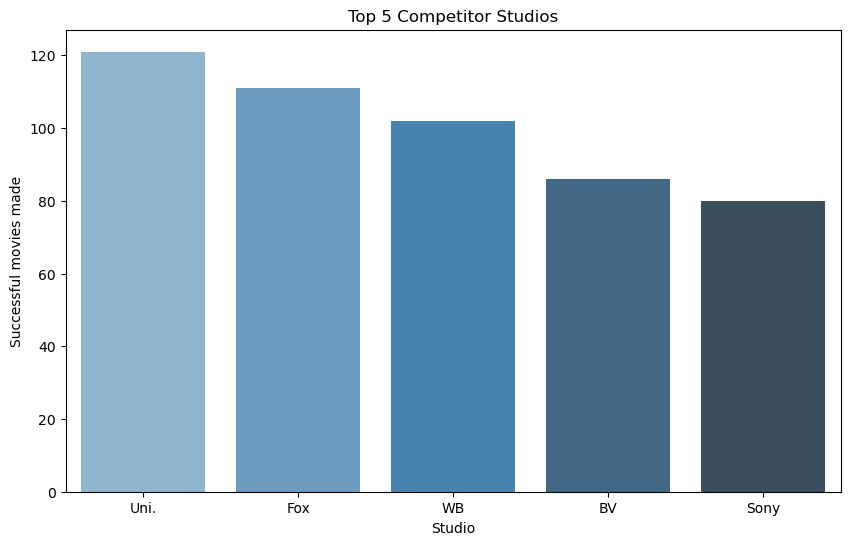

In [39]:
# Converting the Series to a DataFrame
top_5_studios_df = top_5_studios.reset_index()
top_5_studios_df.columns = ['Studio', 'Count']
hue = ['Uni.', 'Fox', 'WB', 'BV', 'Sony']

# Creating the bar chart using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Studio', y='Count', data=top_5_studios_df, hue=hue ,palette='Blues_d', legend=False)
plt.title('Top 5 Competitor Studios')
plt.xlabel('Studio')
plt.ylabel('Successful movies made')
plt.show()

In the bar chart, we can easily see the competitors we have in the project and how many successful movies they have created. This will help the studio in the long run to see which movie production studios to focus on.

Lets create a bar chart to visualise the most popular movie genres.

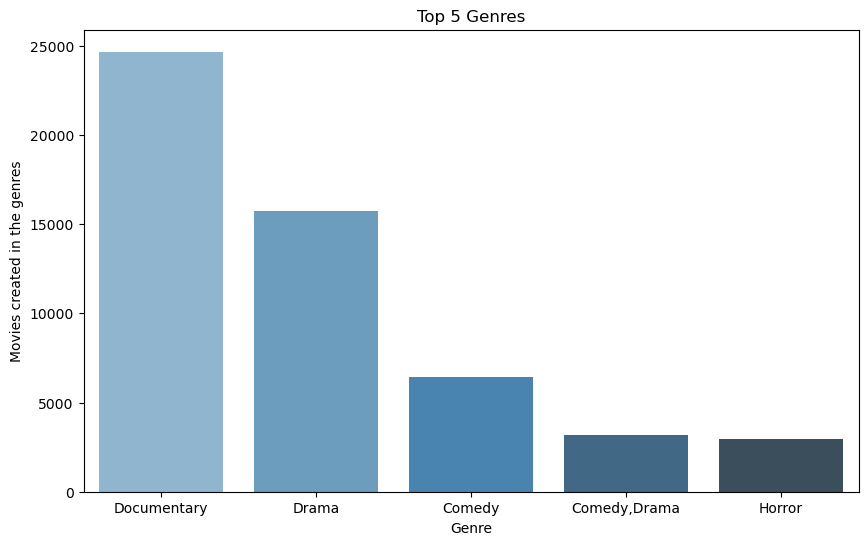

In [40]:
# Converting the Series to a DataFrame
top_5_unique_genres = top_5_unique_genres.reset_index()
top_5_unique_genres.columns = ['Genres', 'Movies created in the genres']
hue = ["Documenatary", "Drama", "Comedy", "Comedy,Drama", "Horror"]

# Creating the bar chart using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Genres', y='Movies created in the genres', data=top_5_unique_genres,
            hue=hue ,palette='Blues_d', legend=False)

plt.title('Top 5 Genres')
plt.xlabel('Genre')
plt.ylabel('Movies created in the genres')
plt.show()

Here we can see the top 5 most popular genres starting from Documentary all the was to Horror. This should influence the type of movies they create and will appeal to a majority of audience brigning in more revenue.

Finally let's visualise the top runtime for movies.

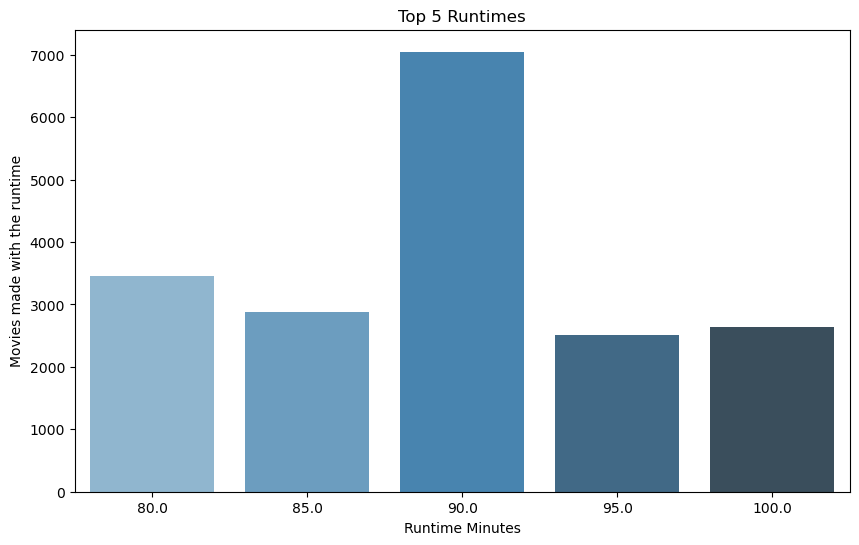

In [41]:
# Converting the Series to a DataFrame
top_5_runtimes_df = top_5_runtimes.reset_index()
top_5_runtimes_df.columns = ['Runtime Minutes', 'Movies made with the runtime']

# Adding the hue column to the DataFrame
hue = ["90.0", "80.0", "85.0", "100.0", "95.0"]
top_5_runtimes_df['Hue'] = hue

# Creating the bar chart using Seaborn with a hue
plt.figure(figsize=(10, 6))
sns.barplot(x='Runtime Minutes', y='Movies made with the runtime', hue='Hue', data=top_5_runtimes_df, palette='Blues_d', legend=False)

plt.title('Top 5 Runtimes')
plt.xlabel('Runtime Minutes')
plt.ylabel('Movies made with the runtime')
plt.show()

Here we can visualise the most popular runtimes. This will help the movie studio make appropriate descisions on how long to make thier movies. This will increase audience engagement and ultimaltely increased revenue.

## Conclusion

The analysis of the provided movie datasets reveals key strategies for competing studios to succeed. Prioritize top-performing genres like action, adventure, and science fiction to align with audience preferences. Tailor runtimes for engaging content and strategic release timing to maximize box office impact. Invest in high-quality productions to solidify reputation and leverage successful franchises for consistent revenue streams. Through these data-driven strategies, competing studios can maintain a competitive edge and thrive in the film industry.